In [15]:
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('all_coffee_reviews.csv')
df.head()

,URL,Rating,Company,Coffee Name,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity,Body,Flavor,Aftertaste,Blind Assessment,Notes,Bottom Line,With Milk
0,https://www.coffeereview.com/review/teapot-rui...,91,Teapot Coffee & Tea,Teapot Ruili Geisha,"Meishan Township, Alishan, Taiwan","Ruili Village, Meishan Township, Alishan, Chia...",Medium-Light,61/79,"NT $1,200/8 ounces",May 2025,8.0,8.0,8.0,9,8.0,"Crisply sweet, delicately tart. Dried red plum...",Produced by,NaN,NaN
1,https://www.coffeereview.com/review/ethiopia-b...,94,Caoban Coffee,Ethiopia Buku Abel Bastet Station Geisha Washe...,"Taipei, Taiwan","Guji Zone, Oromia region, southern Ethiopia",Medium,48/64,NT $600/226 grams,May 2025,9.0,NaN,9.0,9,8.0,"Evaluated as espresso. Sweetly tart, very choc...","Produced by smallholding farmers, entirely of ...",NaN,9.0
2,https://www.coffeereview.com/review/nicaragua-...,93,Rusty Dog Coffee,Nicaragua Jinotega Natural Microlot,"Madison, Wisconsin","Jinotega Department, Nicaragua",Medium-Light,57/75,$24.50/12 ounces,May 2025,NaN,8.0,9.0,9,8.0,"Richly sweet, gently tart. Pomegranate, baking...",Produced by Angelina Lopez of Finca Los Papale...,NaN,NaN
3,https://www.coffeereview.com/review/rwanda-huy...,93,Rusty Dog Coffee,Rwanda Huye Peaberry,"Madison, Wisconsin","Huye District, Rwanda",Medium-Light,58/76,$24.50/12 ounces,May 2025,9.0,8.0,9.0,9,8.0,"Citrus-sweet. Tangerine, cocoa nib, rose hips,...",Produced by smallholding farmers surrounding H...,NaN,NaN
4,https://www.coffeereview.com/review/colombia-e...,95,Utopian Coffee,Colombia Edwin Noreña Geisha,"Fort Wayne, Indiana","Quindio Department, Colombia",Light,62/84,$29.00/8 ounces,May 2025,9.0,9.0,9.0,9,9.0,"Richly floral, deeply fruit-forward. Cherry co...",Produced by Edwin Noreña of Finca Campo Hermos...,NaN,NaN


In [17]:
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL               2899 non-null   object 
 1   Rating            2899 non-null   int64  
 2   Company           2899 non-null   object 
 3   Coffee Name       2899 non-null   object 
 4   Roaster Location  2899 non-null   object 
 5   Coffee Origin     2897 non-null   object 
 6   Roast Level       2832 non-null   object 
 7   Agtron            2899 non-null   object 
 8   Est. Price        2896 non-null   object 
 9   Review Date       2899 non-null   object 
 10  Aroma             2872 non-null   float64
 11  Acidity           2551 non-null   float64
 12  Body              2898 non-null   float64
 13  Flavor            2899 non-null   int64  
 14  Aftertaste        2898 non-null   float64
 15  Blind Assessment  2899 non-null   object 
 16  Notes             2899 non-null   object 


In [18]:
# rename columns 
df.columns = df.columns.str.lower().str.replace(".", "", regex=False)
df.columns

Index(['url', 'rating', 'company', 'coffee name', 'roaster location',
       'coffee origin', 'roast level', 'agtron', 'est price', 'review date',
       'aroma', 'acidity', 'body', 'flavor', 'aftertaste', 'blind assessment',
       'notes', 'bottom line', 'with milk'],
      dtype='object')

In [19]:
df = df.drop(["bottom line"], axis=1)
df.head()

,url,rating,company,coffee name,roaster location,coffee origin,roast level,agtron,est price,review date,aroma,acidity,body,flavor,aftertaste,blind assessment,notes,with milk
0,https://www.coffeereview.com/review/teapot-rui...,91,Teapot Coffee & Tea,Teapot Ruili Geisha,"Meishan Township, Alishan, Taiwan","Ruili Village, Meishan Township, Alishan, Chia...",Medium-Light,61/79,"NT $1,200/8 ounces",May 2025,8.0,8.0,8.0,9,8.0,"Crisply sweet, delicately tart. Dried red plum...",Produced by,NaN
1,https://www.coffeereview.com/review/ethiopia-b...,94,Caoban Coffee,Ethiopia Buku Abel Bastet Station Geisha Washe...,"Taipei, Taiwan","Guji Zone, Oromia region, southern Ethiopia",Medium,48/64,NT $600/226 grams,May 2025,9.0,NaN,9.0,9,8.0,"Evaluated as espresso. Sweetly tart, very choc...","Produced by smallholding farmers, entirely of ...",9.0
2,https://www.coffeereview.com/review/nicaragua-...,93,Rusty Dog Coffee,Nicaragua Jinotega Natural Microlot,"Madison, Wisconsin","Jinotega Department, Nicaragua",Medium-Light,57/75,$24.50/12 ounces,May 2025,NaN,8.0,9.0,9,8.0,"Richly sweet, gently tart. Pomegranate, baking...",Produced by Angelina Lopez of Finca Los Papale...,NaN
3,https://www.coffeereview.com/review/rwanda-huy...,93,Rusty Dog Coffee,Rwanda Huye Peaberry,"Madison, Wisconsin","Huye District, Rwanda",Medium-Light,58/76,$24.50/12 ounces,May 2025,9.0,8.0,9.0,9,8.0,"Citrus-sweet. Tangerine, cocoa nib, rose hips,...",Produced by smallholding farmers surrounding H...,NaN
4,https://www.coffeereview.com/review/colombia-e...,95,Utopian Coffee,Colombia Edwin Noreña Geisha,"Fort Wayne, Indiana","Quindio Department, Colombia",Light,62/84,$29.00/8 ounces,May 2025,9.0,9.0,9.0,9,9.0,"Richly floral, deeply fruit-forward. Cherry co...",Produced by Edwin Noreña of Finca Campo Hermos...,NaN


In [20]:
# let's first clean up the agtron
df[["agtron_1", "agtron_2"]] = df["agtron"].str.split("/", expand=True)
df = df.drop(["agtron"], axis=1)
df.head() 

,url,rating,company,coffee name,roaster location,coffee origin,roast level,est price,review date,aroma,acidity,body,flavor,aftertaste,blind assessment,notes,with milk,agtron_1,agtron_2
0,https://www.coffeereview.com/review/teapot-rui...,91,Teapot Coffee & Tea,Teapot Ruili Geisha,"Meishan Township, Alishan, Taiwan","Ruili Village, Meishan Township, Alishan, Chia...",Medium-Light,"NT $1,200/8 ounces",May 2025,8.0,8.0,8.0,9,8.0,"Crisply sweet, delicately tart. Dried red plum...",Produced by,NaN,61,79
1,https://www.coffeereview.com/review/ethiopia-b...,94,Caoban Coffee,Ethiopia Buku Abel Bastet Station Geisha Washe...,"Taipei, Taiwan","Guji Zone, Oromia region, southern Ethiopia",Medium,NT $600/226 grams,May 2025,9.0,NaN,9.0,9,8.0,"Evaluated as espresso. Sweetly tart, very choc...","Produced by smallholding farmers, entirely of ...",9.0,48,64
2,https://www.coffeereview.com/review/nicaragua-...,93,Rusty Dog Coffee,Nicaragua Jinotega Natural Microlot,"Madison, Wisconsin","Jinotega Department, Nicaragua",Medium-Light,$24.50/12 ounces,May 2025,NaN,8.0,9.0,9,8.0,"Richly sweet, gently tart. Pomegranate, baking...",Produced by Angelina Lopez of Finca Los Papale...,NaN,57,75
3,https://www.coffeereview.com/review/rwanda-huy...,93,Rusty Dog Coffee,Rwanda Huye Peaberry,"Madison, Wisconsin","Huye District, Rwanda",Medium-Light,$24.50/12 ounces,May 2025,9.0,8.0,9.0,9,8.0,"Citrus-sweet. Tangerine, cocoa nib, rose hips,...",Produced by smallholding farmers surrounding H...,NaN,58,76
4,https://www.coffeereview.com/review/colombia-e...,95,Utopian Coffee,Colombia Edwin Noreña Geisha,"Fort Wayne, Indiana","Quindio Department, Colombia",Light,$29.00/8 ounces,May 2025,9.0,9.0,9.0,9,9.0,"Richly floral, deeply fruit-forward. Cherry co...",Produced by Edwin Noreña of Finca Campo Hermos...,NaN,62,84


In [21]:
# standard prices to per oz
import re

def standardize_pricing(price_string):
    """
    Standardizes a coffee price string to USD per ounce.

    Args:
        price_string: A string representing the coffee price,
                      e.g., '$xx.xx/y [ounces or grams]' or
                      'NT $xx.xx/y [ounces or grams]'.

    Returns:
        The price per ounce in USD as a float, or None if the
        string is not in the expected format.
    """
    if not isinstance(price_string, str):
        return None
    
    
    pattern = re.compile(r"""
        (?P<currency>NT\s\$|\$)? # optional currency (NT or USD)
        \s* # optional whitespace
        (?P<price>[\d,]+(?:\.\d+)?) # the price
        / # seperator
        (?P<weight>\d+) # weight
        \s* # optional whitespace
        (?P<unit>ounces|grams)                     
    """, re.VERBOSE | re.IGNORECASE)
    
    match = pattern.match(price_string)
    
    if not match:
        return None
    
    parts = match.groupdict()
    
    price = float(parts["price"].replace(",", ""))
    weight = float(parts["weight"])
    unit = parts["unit"].lower()
    currency = "USD" if parts["currency"] == "$" else "NT"
    
    if unit == 'grams':
        weight_oz = weight / 28.34952
    else:
        weight_oz = weight
        
    if weight_oz == 0:
        return None
    
    # 6/9/25
    ntd_to_usd_rate = 29.9340
    price_usd = price
    
    if currency == "NT":
        price_usd /= ntd_to_usd_rate
    
    price_per_oz = price_usd / weight_oz
    
    return price_per_oz


In [22]:
df["price_per_oz"] = np.round(df["est price"].apply(standardize_pricing), 2)
display(df["price_per_oz"][:20])
display(df['est price'][:20])
df = df.drop(['est price'], axis=1)

0     5.01
1     2.51
2     2.04
3     2.04
4     3.62
5     1.92
6     1.75
7     1.75
8     3.33
9     1.58
10    1.25
11    3.75
12    2.87
13    2.87
14    2.87
15    3.12
16    2.83
17    2.83
18    2.83
19    1.04
Name: price_per_oz, dtype: float64

0     NT $1,200/8 ounces
1      NT $600/226 grams
2       $24.50/12 ounces
3       $24.50/12 ounces
4        $29.00/8 ounces
5       $23.00/12 ounces
6       $21.00/12 ounces
7       $21.00/12 ounces
8       $39.99/12 ounces
9       $19.00/12 ounces
10      $19.99/16 ounces
11       $29.99/8 ounces
12       $22.99/8 ounces
13       $22.99/8 ounces
14       $22.99/8 ounces
15       $24.99/8 ounces
16      $25.00/250 grams
17      $25.00/250 grams
18      $25.00/250 grams
19      NT $250/8 ounces
Name: est price, dtype: object

In [23]:
df['coffee origin'][:10]

0    Ruili Village, Meishan Township, Alishan, Chia...
1          Guji Zone, Oromia region, southern Ethiopia
2                       Jinotega Department, Nicaragua
3                                Huye District, Rwanda
4                         Quindio Department, Colombia
5    Toraja growing region, south-central Sulawesi,...
6                  Huehuetenango Department, Guatemala
7    Cyiya Village, Nyamasheke District, Western Pr...
8                       Central America; South America
9    Kihoya, Mathioya District, Murang’a County, Kenya
Name: coffee origin, dtype: object

In [24]:
known_origins = [
    'north america', 
    'central america',
    'south america',
    'asia',
    'costa rica', 
    'el salvador', 
    'puerto rico',
    'united states',
    'papua new guinea',
    'dominican republic',
    'colombia',
    'ethiopia',
    'guatemala',
    'honduras',
    'indonesia',
    'nicaragua',
    'thailand',
    'tanzania',
    'vietnam',
    'mexico',
    'brazil',
    'panama',
    'hawaii', 
    'kenya',
    'rwanda',
    'china', 
    'india',
    'peru',
    'yemen',
    'burundi',
    'taiwan'
]

def extract_origins(origin_string, known):
    """
    Extracts a list of known countries or regions from a string.

    Args:
        origin_string (str): The string from the 'coffee origin' column.
        known_list (list): A list of countries to search for.

    Returns:
        list: A list of unique countries found in the string.
    """
    if not isinstance(origin_string, str):
        return None
    
    found_origins = set()
    
    potential_origins = origin_string.split(";")
    
    for part in potential_origins:
        for origin in known:
            if re.search(r"\b" + re.escape(origin) + r"\b", part, re.IGNORECASE):
                found_origins.add(origin)
    
    return sorted(list(found_origins))

In [25]:
df["countries_extracted"] = df["coffee origin"].apply(lambda origin: extract_origins(origin, known_origins))

display(df[["countries_extracted", "coffee origin"]][:20])

print(df[df["countries_extracted"].isnull()]['coffee origin'])

,countries_extracted,coffee origin
0,[taiwan],"Ruili Village, Meishan Township, Alishan, Chia..."
1,[ethiopia],"Guji Zone, Oromia region, southern Ethiopia"
2,[nicaragua],"Jinotega Department, Nicaragua"
3,[rwanda],"Huye District, Rwanda"
4,[colombia],"Quindio Department, Colombia"
5,[indonesia],"Toraja growing region, south-central Sulawesi,..."
6,[guatemala],"Huehuetenango Department, Guatemala"
7,[rwanda],"Cyiya Village, Nyamasheke District, Western Pr..."
8,"[central america, south america]",Central America; South America
9,[kenya],"Kihoya, Mathioya District, Murang’a County, Kenya"


257    NaN
517    NaN
Name: coffee origin, dtype: object


In [31]:
# one hot encode countries
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df["countries_extracted"] = df["countries_extracted"].apply(
    lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x
)
df = df.dropna(subset=["countries_extracted"])
one_hot_df = pd.DataFrame(
    mlb.fit_transform(df["countries_extracted"]),
    columns=mlb.classes_,
    index=df.index
)

len(one_hot_df.columns)

29

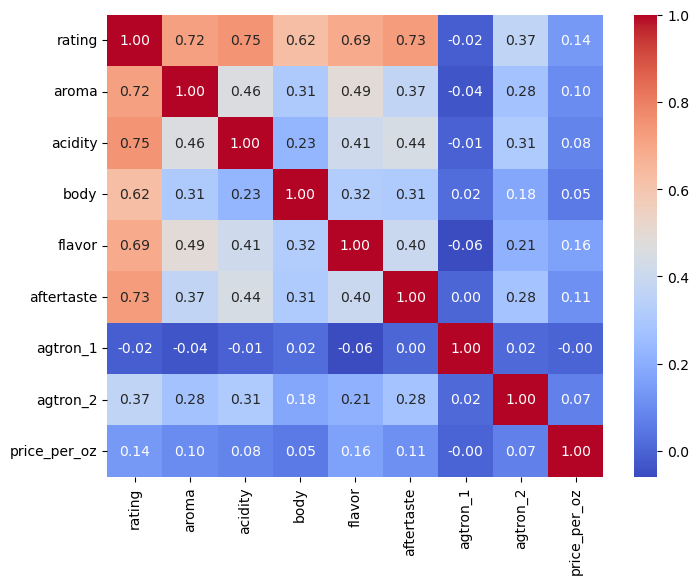

In [39]:
df_num_cols = ["rating", "aroma", "acidity", "body", "flavor", "aftertaste", "agtron_1", "agtron_2", "price_per_oz"]
df[df_num_cols] = df[df_num_cols].replace('', np.nan)

# Now safely convert to float
df_num = df[df_num_cols].astype(float).dropna()

cov_matrix = df_num.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show();

In [ ]:
# let's see if the statistical ratings directly predict the rating

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df_num.drop(columns=["rating", "agtron_1", "agtron_2", "price_per_oz"]))
y = np.array(df_num["rating"])

cols = ["aroma", "acidity", "body", "flavor", "aftertaste"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

def mse(y, y_hat):
    n = y.shape[0]
    return np.sum((y - y_hat) ** 2) / n

print("MSE Train: ", mse(y_train, y_pred_train))
print("MSE Test: ", mse(y_test, y_pred_test))

print(dict(zip(cols, lr_model.coef_)))
print(lr_model.intercept_)


MSE Train:  0.010508975619312286
MSE Test:  0.00998867954553627
{'aroma': 1.0103480346502338, 'acidity': 0.9992293615264101, 'body': 0.9947360538518051, 'flavor': 1.0232893976973891, 'aftertaste': 0.990207971264107}
49.83029210175165


Index(['rating', 'aroma', 'acidity', 'body', 'flavor', 'aftertaste',
       'agtron_1', 'agtron_2', 'price_per_oz'],
      dtype='object')

In [64]:
X = np.array(df_num[["agtron_1", "agtron_2"]])
y = np.array(df_num["rating"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("MSE Train: ", mse(y_train, y_pred_train))
print("MSE Test: ", mse(y_test, y_pred_test))

print(dict(zip(["agrton_1", "agtron_2"], lr_model.coef_)))
print(lr_model.intercept_)

print(f"{y_test[:5]}, {y_pred_test[:5]}")

MSE Train:  2.3182506487249857
MSE Test:  1.9019383154481548
{'agrton_1': -0.0002871427586582061, 'agtron_2': 0.08595815828712637}
86.52535083915154
[93. 90. 92. 92. 93.], [93.38420065 92.78364211 92.95555843 94.50251814 93.04151659]
